# Temperature Outliers

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the LAX temperature dataset into a dataframe
data = pd.read_csv("../Resources/lax_temperature.csv")

In [9]:
# Filter the dataset to only include the `HourlyDryBulbTemperature` column
temps = data[['HourlyDryBulbTemperature']]

In [22]:
# df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
# ax = df.plot(kind='box',
#              color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
#              boxprops=dict(linestyle='-', linewidth=1.5),
#              flierprops=dict(linestyle='-', linewidth=1.5),
#              medianprops=dict(linestyle='-', linewidth=1.5),
#              whiskerprops=dict(linestyle='-', linewidth=1.5),
#              capprops=dict(linestyle='-', linewidth=1.5),
#              showfliers=False, grid=True, rot=0)
# ax.set_xlabel('Foo')
# ax.set_ylabel('Bar in X')
# plt.show()

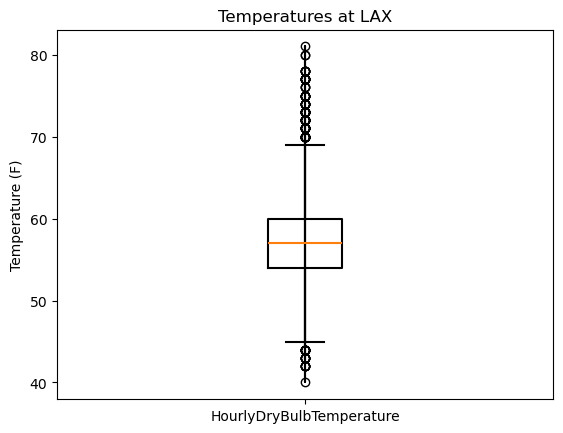

In [28]:
# Create a boxplot to visualize the filtered dataset
temps.plot(kind='box', 
           title="Temperatures at LAX", 
           color=dict(boxes='r', whiskers='r', medians='r', caps='r'),
           boxprops=dict(linestyle='-', linewidth=1.5),
           flierprops=dict(linestyle='-', linewidth=1.5),
           medianprops=dict(linestyle='-', linewidth=1.5),
           whiskerprops=dict(linestyle='-', linewidth=1.5),
           capprops=dict(linestyle='-', linewidth=1.5),
           ylabel='Temperature (F)')
plt.show()

In [17]:
def find_outliers_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q2 = data[column].quantile(0.50)
    Q3 = data[column].quantile(0.75)

    IQR = Q3 - Q1
    lb = Q1 - (1.5 * IQR)
    ub = Q3 + (1.5 * IQR)

#     outliers = data[column][(data[column] < lower_bound) | (data[column] > upper_bound)]

    return Q1, Q2, Q3, IQR, lb, ub

In [31]:
# quartiles = temps['HourlyDryBulbTemperature'].quantile([0.25, 0.5, .75])
# quartiles[0.25]
# quartiles[0.5]
# quartiles[0.75]

In [18]:
Q1, Q2, Q3, IQR, lb, ub = find_outliers_IQR(temps, 'HourlyDryBulbTemperature')

In [19]:
# Use Pandas to calculate the quartiles, IQR, and median, and print the results
print(f"The lower quartile of temperatures is: {Q1}")
print(f"The upper quartile of temperatures is: {Q3}")
print(f"The interquartile range of temperatures is: {IQR}")
print(f"The the median of temperatures is: {Q2}")

The lower quartile of temperatures is: 54.0
The upper quartile of temperatures is: 60.0
The interquartile range of temperatures is: 6.0
The the median of temperatures is: 57.0


In [20]:
# Use the IQR to determine an upper and lower bound for outliers, then print the results
print(f"Values below {lb} could be outliers.")
print(f"Values above {ub} could be outliers.")

Values below 45.0 could be outliers.
Values above 69.0 could be outliers.
